In [1]:
version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          4.1                         
year           2024                        
month          06                          
day            14                          
svn rev        86737                       
language       R                           
version.string R version 4.4.1 (2024-06-14)
nickname       Race for Your Life          

In [2]:
# Load required libraries
# install.packages("keras")
# install.packages("xgboost")
install.packages("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppTOML’, ‘here’, ‘png’, ‘config’, ‘tfautograph’, ‘reticulate’, ‘tensorflow’, ‘tfruns’, ‘zeallot’


Warning message in install.packages("keras"):
“installation of package ‘RcppTOML’ had non-zero exit status”
Warning message in install.packages("keras"):
“installation of package ‘reticulate’ had non-zero exit status”
Warning message in install.packages("keras"):
“installation of package ‘tfautograph’ had non-zero exit status”
Warning message in install.packages("keras"):
“installation of package ‘tfruns’ had non-zero exit status”
Warning message in install.packages("keras"):
“installation of package ‘tensorflow’ had non-zero exit status”
Warning message in install.packages("keras"):
“installation of package ‘keras’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
# remove.packages("keras")
install.packages("keras3")
# library(keras3)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppTOML’, ‘tfautograph’, ‘reticulate’, ‘tensorflow’, ‘tfruns’




In [4]:
install.packages("xgboost")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# install.packages("remotes")
# remotes::install_github("dmlc/xgboost", subdir = "R-package")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


'/usr/bin/git' clone --depth 1 --no-hardlinks --recurse-submodules --branch main https://github.com/dmlc/dmlc-core /tmp/RtmppQGUaU/remotesa77309f328/dmlc-xgboost-24aeaf4/R-package/../dmlc-core

'/usr/bin/git' clone --depth 1 --no-hardlinks --recurse-submodules https://github.com/rapidsai/gputreeshap.git /tmp/RtmppQGUaU/remotesa77309f328/dmlc-xgboost-24aeaf4/R-package/../gputreeshap



data.table (1.16.0 -> 1.16.2) [CRAN]


Installing 1 packages: data.table

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmppQGUaU/remotesa77309f328/dmlc-xgboost-24aeaf4/R-package/DESCRIPTION’ ... OK
* preparing ‘xgboost’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* running ‘cleanup’
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘xgboost_2.2.0.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘/tmp/RtmppQGUaU/filea778a08cdf/xgboost_2.2.0.0.tar.gz’ had non-zero exit status”


In [6]:
library(keras3)
library(xgboost)
library(randomForest)
library(ggplot2)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin




In [ ]:
getwd()

[1] "/content"

In [2]:
# List of dataset file paths
dataset_files <- c("/content/dataset_files/station00.csv")
# , "/content/dataset_files/station01.csv", "/content/dataset_files/station02.csv", "/content/dataset_files/station03.csv", "/content/dataset_files/station04.csv", "/content/dataset_files/station05.csv", "/content/dataset_files/station06.csv", "/content/dataset_files/station07.csv", "/content/dataset_files/station08.csv", "/content/dataset_files/station09.csv"

In [3]:
# Initialize empty list to store datasets
datasets <- list()

In [4]:
# Loop through each dataset file and load into a list
for (file in dataset_files) {
  dataset <- read.csv(file)  # Load each dataset
  datasets[[file]] <- dataset  # Store in the list
}

Warning message in file(file, "rt"):
“cannot open file '/content/dataset_files/station00.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [13]:
# Combine all datasets into one large dataset
combined_dataset <- do.call(rbind, datasets)

In [67]:
# Subset the data to only use 300 samples
set.seed(42)
sampled_idx <- sample(1:nrow(combined_dataset), 300)
sampled_data <- combined_dataset[sampled_idx, ]

In [68]:
# Select middle 13 columns as features and last column as the target variable
if (ncol(combined_dataset) < 15) stop("Not enough columns in the dataset.")
X <- combined_dataset[, 2:(ncol(combined_dataset)-1)]  # Middle 13 columns as features
y <- combined_dataset$power  # Last column 'power' as the target

In [69]:
# Split into 80% training and 20% testing
set.seed(42)
n <- nrow(X)
train_idx <- sample(1:n, size = 0.8 * n)
test_idx <- setdiff(1:n, train_idx)

In [ ]:
cat("Number of rows in train_set: ", nrow(train_idx), "\n")
cat("Number of rows in test_set: ", nrow(test_idx), "\n")

In [ ]:
# Inside the For-loop, write code so that one histogram is plotted for each column.
for(i in 2:14) {
# 提取第 i 列的列名
  column_name <- names(dataset)[i]
  # 绘制直方图
  hist(Smarket[[i]], main = paste("Histogram of", column_name), xlab = column_name)
}

In [ ]:
mmodel <- lm (power ~ lmd_windspeed + lmd_winddirection + lmd_pressure + lmd_temperature + lmd_diffuseirrad + lmd_totalirrad + nwp_pressure + nwp_winddirection + nwp_windspeed + nwp_humidity + nwp_globalirrad + nwp_directirrad + nwp_temperature, data = train_idx)

In [ ]:
summary(mmodel)

In [ ]:
summary(mmodel)$coef

In [ ]:
RSE = sigma(mmodel)  # RSE
error_rate = RSE/mean(train_set$sales)

print(RSE)
print(error_rate)

In [ ]:
library()

In [ ]:
library(Amelia)
library(mlbench)
missmap(mmodel, col=c("blue", "red"), legend=FALSE)

In [ ]:
library(corrplot)

# Calculate the correlation matrix using the `cor` function
correlations <- cor(mmodel[, 2:14])#complete here
correlations

In [ ]:
# Use the corrplot function with the shade method.
corrplot(correlations, method = "shade")

In [ ]:
# Use the corrplot function with the pie method.
corrplot(correlations, method = "pie")

In [ ]:
# Use the corrplot function with the circle method.
corrplot(correlations, method = "circle")

In [ ]:
pairs(mmodel, col=mmodel$power)

In [ ]:
library(caret)

In [ ]:
x <- Smarket[,2:14]
y <- Smarket[,15]
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

In [ ]:
# Create a  Logistics Regression called glm.fit, having Direction as Dependent Variable.
# Don't forget to provide the family parameter.
glm.fit <- glm(power ~ lmd_windspeed + lmd_winddirection + lmd_pressure + lmd_temperature + lmd_diffuseirrad + lmd_totalirrad + nwp_pressure + nwp_winddirection + nwp_windspeed + nwp_humidity + nwp_globalirrad + nwp_directirrad + nwp_temperature, data = mmodel, family = binomial)#Complete here

In [ ]:
summary(glm.fit)

In [ ]:
glm.probs <- predict(glm.fit,type = "response")
glm.probs[1:5]

In [ ]:
# Write your code here, use the ifelse function and 0.5 as threshold to define "Up" and "Down".
glm.pred <- ifelse(glm.probs > 0.5, "Up", "Down")#Complete here.

In [ ]:
attach(mmodel)
table(glm.pred,Direction)

In [ ]:
# Use the mean function to check accuracy.
mean(glm.pred == power)

In [70]:
X_train <- as.matrix(X[train_idx, ])
y_train <- y[train_idx]
X_test <- as.matrix(X[test_idx, ])
y_test <- y[test_idx]

In [ ]:
head(dataset,10)

In [ ]:
tail(dataset,10)

In [ ]:
summary(dataset)

In [ ]:
str(dataset)

In [ ]:
length(dataset)

In [ ]:
names(dataset)

In [ ]:
colnames(dataset)

In [ ]:
plot(dataset)

In [ ]:
plot(dataset$power, dataset$Income, xlab = 'Power', ylab = 'Income', main = 'Age vs Income')

In [ ]:
df$Gender <- factor(df$Gender)
df$Education <- factor(df$Education)

In [ ]:
hist(df$power, xlab = 'Power', main = 'Histogram of Power')

In [71]:
# Prepare data for LSTM
X_train_lstm <- array(X_train, dim = c(nrow(X_train), ncol(X_train), 1))
X_test_lstm <- array(X_test, dim = c(nrow(X_test), ncol(X_test), 1))

In [72]:
# Build LSTM model - note that we explicitly pass 'input_shape' as a keyword argument
lstm_model <- keras_model_sequential()

In [73]:
# Add LSTM layer
lstm_model %>%
  layer_lstm(units = 10, input_shape = list(ncol(X_train), 1), return_sequences = FALSE)

In [74]:
# Add dense layer
lstm_model %>%
  layer_dense(units = 1)

In [75]:
# Compile the model
lstm_model %>% compile(
  optimizer = 'adam',
  loss = 'mse'
)

In [76]:
# Train the LSTM model
lstm_model %>% fit(
  X_train_lstm, y_train, epochs = 10, batch_size = 30, verbose = 1
)

In [77]:
# Get predictions from the LSTM model
lstm_train_pred <- lstm_model %>% predict(X_train_lstm)
lstm_test_pred <- lstm_model %>% predict(X_test_lstm)

In [78]:
# Convert data to DMatrix for XGBoost
dtrain <- xgb.DMatrix(data = X_train, label = y_train)
dtest <- xgb.DMatrix(data = X_test, label = y_test)  # Add labels for evaluation

In [79]:
# Set parameters for XGBoost
xgb_params <- list(
  objective = "reg:squarederror",
  eta = 0.1,
  max_depth = 3
)

In [80]:
# Train XGBoost model
xgb_model <- xgb.train(params = xgb_params, data = dtrain, nrounds = 50)

In [81]:
# Get predictions from XGBoost
xgb_train_pred <- predict(xgb_model, X_train)
xgb_test_pred <- predict(xgb_model, X_test)

In [82]:
# Train Random Forest model
rf_model <- randomForest(X_train, y_train, ntree = 100)

In [83]:
# Get predictions from Random Forest
rf_train_pred <- predict(rf_model, X_train)
rf_test_pred <- predict(rf_model, X_test)

In [84]:
# Create new train and test datasets from predictions of base models
stack_train <- data.frame(
  lstm = lstm_train_pred,
  xgb = xgb_train_pred,
  rf = rf_train_pred
)

stack_test <- data.frame(
  lstm = lstm_test_pred,
  xgb = xgb_test_pred,
  rf = rf_test_pred
)

In [85]:
# Train a simple linear regression model as the meta-learner
meta_model <- lm(y_train ~ ., data = stack_train)

In [86]:
# Get final predictions using the meta-learner
final_train_pred <- predict(meta_model, stack_train)
final_test_pred <- predict(meta_model, stack_test)

In [87]:
# Define RMSE function
rmse <- function(actual, predicted) {
  sqrt(mean((actual - predicted)^2))
}

In [ ]:
# Define R-squared function
r_squared <- function(actual, predictions) {
  ss_res <- sum((actual - predictions)^2)  # Residual sum of squares
  ss_tot <- sum((actual - mean(actual))^2)  # Total sum of squares
  1 - (ss_res / ss_tot)
}

In [88]:
# Calculate RMSE for training and testing sets
train_rmse <- rmse(y_train, final_train_pred)
test_rmse <- rmse(y_test, final_test_pred)

cat("Train RMSE: ", train_rmse, "\n")
cat("Test RMSE: ", test_rmse, "\n")

Train MSE:  0.002788036 
Test MSE:  0.02177669 


In [ ]:
# Calculate R-squared using actual sales and predicted values
train_r_squared_value <- r_squared(y_train, final_train_pred)
test_r_squared_value <- r_squared(y_test, final_test_pred)
# Print the R-squared values
cat("Train R-squared: ", train_r_squared_value, "\n")
cat("Test R-squared: ", test_r_squared_value, "\n")

In [ ]:
train_error_rate_test <- train_rmse/mean(y_train)
train_error_rate_test
test_error_rate_test <- test_rmse/mean(y_test)
test_error_rate_test

In [89]:
# Visualize the RMSE for training and testing sets
rmse_data <- data.frame(
  dataset = c("Training", "Testing"),
  rmse_value = c(train_rmse, test_rmse)
)

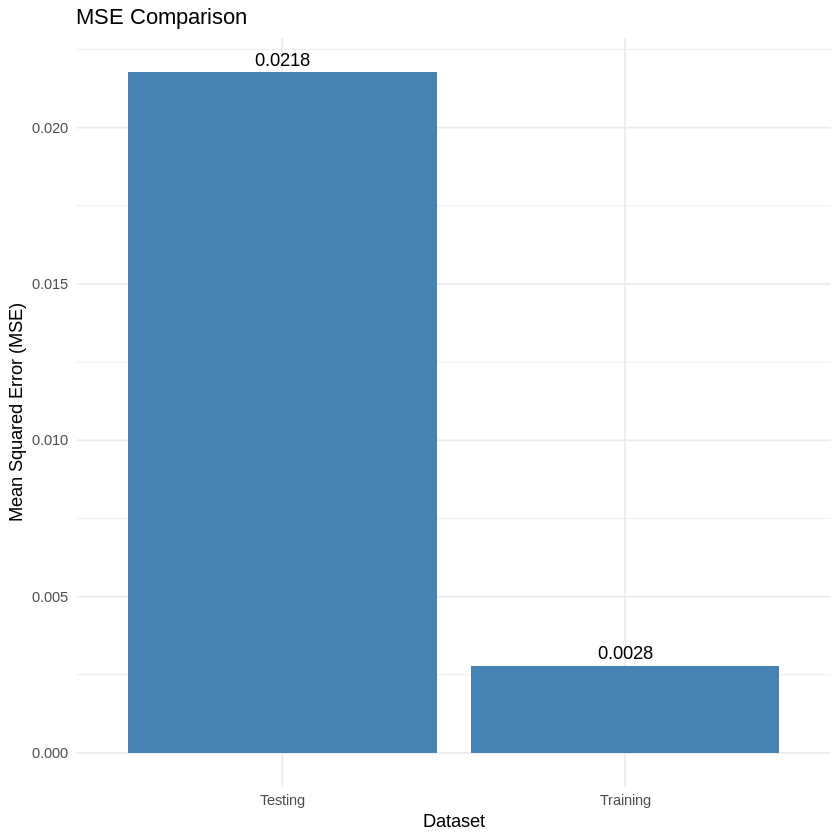

In [90]:
ggplot(rmse_data, aes(x = dataset, y = rmse_value)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  geom_text(aes(label = round(rmse_value, 4)), vjust = -0.5) +
  labs(title = "RMSE Comparison", x = "Dataset", y = "Root Mean Squared Error (RMSE)") +
  theme_minimal()

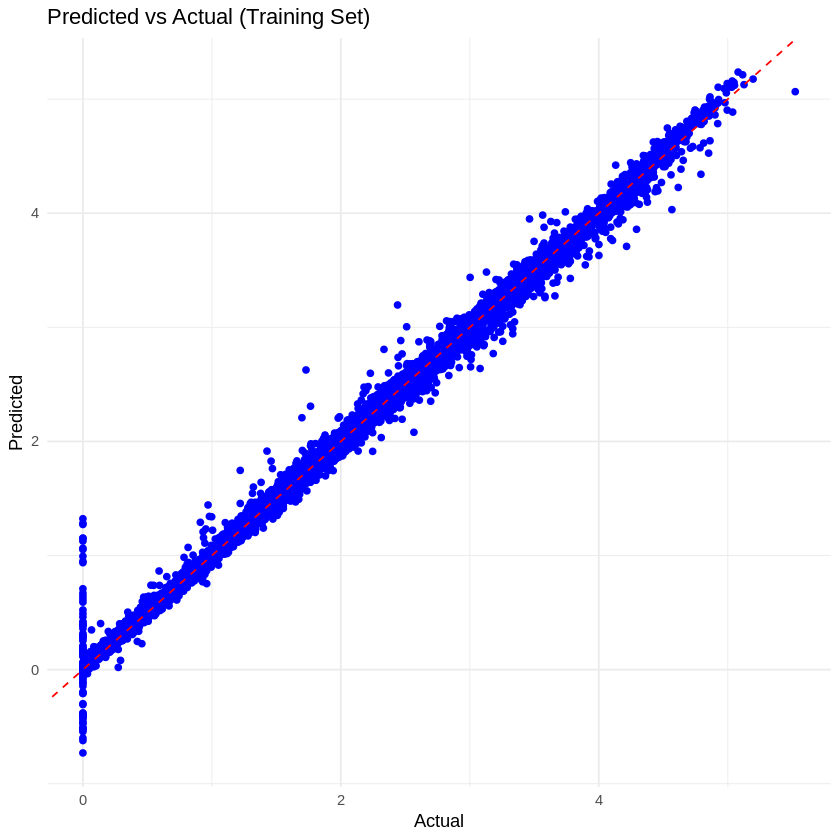

In [91]:
# Visualizing predicted vs actual values for training set
ggplot(data.frame(actual = y_train, predicted = final_train_pred), aes(x = actual, y = predicted)) +
  geom_point(color = "blue") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
  labs(title = "Predicted vs Actual (Training Set)", x = "Actual", y = "Predicted") +
  theme_minimal()

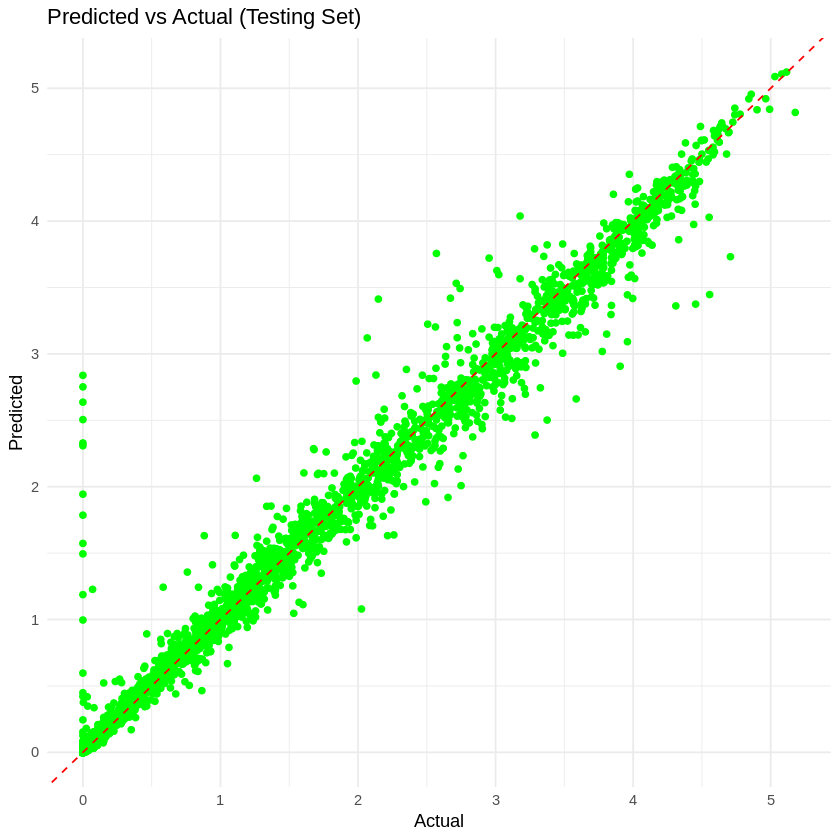

In [92]:
# Visualizing predicted vs actual values for testing set
ggplot(data.frame(actual = y_test, predicted = final_test_pred), aes(x = actual, y = predicted)) +
  geom_point(color = "green") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
  labs(title = "Predicted vs Actual (Testing Set)", x = "Actual", y = "Predicted") +
  theme_minimal()